##Importing required libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

##Importing the dataset

In [109]:
df=pd.read_csv('/content/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


##Information about the dataset

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


##Checking for null values

In [111]:
df.isna().count()

school             2133
school_setting     2133
school_type        2133
classroom          2133
teaching_method    2133
n_student          2133
student_id         2133
gender             2133
lunch              2133
pretest            2133
posttest           2133
dtype: int64

##Dropping duplicate values

In [112]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


##Dropping off columns

In [113]:
df.drop(['school','classroom','student_id'], axis=1, inplace=True)

##Printing unique values of each columns

In [114]:
print("School_setting",str(df['school_setting'].unique()))
print("School_type",str(df['school_type'].unique()))
print("Teaching_Method",str(df['teaching_method'].unique()))
print("Gender",str(df['gender'].unique()))
print("Lunch",str(df['lunch'].unique()))

School_setting ['Urban' 'Suburban' 'Rural']
School_type ['Non-public' 'Public']
Teaching_Method ['Standard' 'Experimental']
Gender ['Female' 'Male']
Lunch ['Does not qualify' 'Qualifies for reduced/free lunch']


##Encoding

In [115]:
ohe_binaries = OneHotEncoder(drop='first',sparse = False)
ohe_binaries.fit(df[['school_type','teaching_method','gender','lunch']])
df[['school_type','teaching_method','gender','lunch']] = ohe_binaries.transform(df[['school_type','teaching_method','gender','lunch']])

In [116]:
ohe_setting = OneHotEncoder(sparse=False)
ohe_setting.fit(df[['school_setting']])
school_setting_encoded = ohe_setting.transform(df[['school_setting']])
df["Urban"],df["Suburban"],df["Rural"]=school_setting_encoded.T
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,Urban,Suburban,Rural
0,Urban,0.0,1.0,20.0,0.0,0.0,62.0,72.0,0.0,0.0,1.0
1,Urban,0.0,1.0,20.0,0.0,0.0,66.0,79.0,0.0,0.0,1.0
2,Urban,0.0,1.0,20.0,1.0,0.0,64.0,76.0,0.0,0.0,1.0
3,Urban,0.0,1.0,20.0,0.0,0.0,61.0,77.0,0.0,0.0,1.0
4,Urban,0.0,1.0,20.0,1.0,0.0,64.0,76.0,0.0,0.0,1.0


In [117]:
df.drop('school_setting',axis=1,inplace=True)
df.head()

,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,Urban,Suburban,Rural
0,0.0,1.0,20.0,0.0,0.0,62.0,72.0,0.0,0.0,1.0
1,0.0,1.0,20.0,0.0,0.0,66.0,79.0,0.0,0.0,1.0
2,0.0,1.0,20.0,1.0,0.0,64.0,76.0,0.0,0.0,1.0
3,0.0,1.0,20.0,0.0,0.0,61.0,77.0,0.0,0.0,1.0
4,0.0,1.0,20.0,1.0,0.0,64.0,76.0,0.0,0.0,1.0


In [118]:
#Finding correlation between features
corr=df.corr()
corr

,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,Urban,Suburban,Rural
school_type,1.000000,0.153593,0.548190,0.017593,0.171196,-0.361158,-0.373916,0.087246,-0.017648,-0.058419
teaching_method,0.153593,1.000000,0.105900,-0.020087,0.017970,-0.115185,-0.312884,-0.044259,-0.059121,0.094691
n_student,0.548190,0.105900,1.000000,-0.019265,0.367018,-0.499253,-0.504886,-0.368704,-0.187348,0.497194
gender,0.017593,-0.020087,-0.019265,1.000000,-0.016134,0.006048,0.006902,0.049441,-0.027849,-0.016048
lunch,0.171196,0.017970,0.367018,-0.016134,1.000000,-0.622420,-0.598371,0.045522,-0.125442,0.080599
pretest,-0.361158,-0.115185,-0.499253,0.006048,-0.622420,1.000000,0.950884,-0.143273,0.466264,-0.321962
posttest,-0.373916,-0.312884,-0.504886,0.006902,-0.598371,0.950884,1.000000,-0.122316,0.454704,-0.328997
Urban,0.087246,-0.044259,-0.368704,0.049441,0.045522,-0.143273,-0.122316,1.000000,-0.398891,-0.481690
Suburban,-0.017648,-0.059121,-0.187348,-0.027849,-0.125442,0.466264,0.454704,-0.398891,1.000000,-0.611462
Rural,-0.058419,0.094691,0.497194,-0.016048,0.080599,-0.321962,-0.328997,-0.481690,-0.611462,1.000000


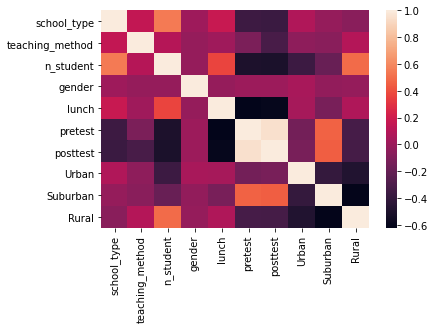

In [119]:
#plotting heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [120]:
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_df.head()

,Feature 1,Feature 2,Correlation
0,school_type,school_type,1.000000
1,school_type,teaching_method,0.153593
2,school_type,n_student,0.548190
3,school_type,gender,0.017593
4,school_type,lunch,0.171196


In [121]:
corr_df.sort_values(by=['Correlation'],ascending=False,inplace=True)
corr_df = corr_df[corr_df['Feature 1'] != corr_df['Feature 2']]
corr_df.head(10)

,Feature 1,Feature 2,Correlation
65,posttest,pretest,0.950884
56,pretest,posttest,0.950884
2,school_type,n_student,0.548190
20,n_student,school_type,0.548190
92,Rural,n_student,0.497194
29,n_student,Rural,0.497194
85,Suburban,pretest,0.466264
58,pretest,Suburban,0.466264
68,posttest,Suburban,0.454704
86,Suburban,posttest,0.454704


In [122]:
print("Minimum Correlation:", corr_df.Correlation.min())
print("Maximum Correlation:", corr_df.Correlation.max())

Minimum Correlation: -0.6224203266721798
Maximum Correlation: 0.9508842857175777


In [123]:
#setting up X and y
X=df.drop('posttest',axis=1)
y= df['posttest']

In [124]:
#implementing model and checking cross-validation score
model = LinearRegression()
scores = cross_val_score(model, X, y)
base_model_score = scores.mean()
base_model_score

0.9144359295686628

In [125]:
permute_model = LinearRegression().fit(X,y)
permutation_score = permutation_importance(permute_model, X, y, n_repeats=10)
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)
importance_df.columns = ['Feature', 'Score Decrease']
importance_df.sort_values(by='Score Decrease', ascending=False)

,Feature,Score Decrease
5,pretest,1.55741
1,teaching_method,0.0823547
4,lunch,0.00197397
2,n_student,0.00163634
7,Suburban,0.000430024
6,Urban,0.000218025
8,Rural,2.14528e-05
3,gender,1.01828e-05
0,school_type,2.05645e-06


In [126]:
X = df.drop(['posttest','school_type', 'gender','Rural'],axis=1)
y = df['posttest']
model2 = LinearRegression()
scores2 = cross_val_score(model2, X, y)
model_score = scores2.mean()
model_score

0.9145914984299891